In [1]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OrdinalEncoder

In [2]:
df=pd.read_csv('/content/drive/MyDrive/ColabNotebooks/logatta.csv')
df

,Age,BusinessTravel,Education,MaritalStatus,OverTime,EmployeeNumber,DailyRate,Gender,accepted for the interview
0,41,Travel_Rarely,2,Single,Yes,1,1102,Female,True
1,49,Travel_Frequently,1,Married,No,2,279,Male,False
2,37,Travel_Rarely,2,Single,Yes,4,1373,Male,False
3,33,Travel_Frequently,4,Married,Yes,5,1392,Female,False
4,27,Travel_Rarely,1,Married,No,7,591,Male,False
...,...,...,...,...,...,...,...,...,...
1487,35,Travel_Rarely,3,Married,Yes,1856,682,Male,False
1488,35,Travel_Rarely,4,Divorced,No,1857,1103,Male,False
1489,31,Travel_Rarely,3,Single,Yes,1858,976,Male,False
1490,37,Travel_Rarely,4,Single,No,1859,1351,Female,False


In [3]:
print(df['BusinessTravel'].unique())
print(df['MaritalStatus'].unique())
print(df['OverTime'].unique())
print(df['Gender'].unique())
print(df['accepted for the interview'].unique())

['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
['Single' 'Married' 'Divorced']
['Yes' 'No']
['Female' 'Male']
[ True False]


In [4]:
#Encoding
column1= ['Travel_Rarely', 'Travel_Frequently', 'Non-Travel']
column2= ['Single', 'Married', 'Divorced']
column3= ['Yes', 'No']
column4= ['Female', 'Male']
column5= [ False, True]

enc1=OrdinalEncoder(categories=[column1])
enc2=OrdinalEncoder(categories=[column2])
enc3=OrdinalEncoder(categories=[column3])
enc4=OrdinalEncoder(categories=[column4])
enc5=OrdinalEncoder(categories=[column5])
df['BusinessTravel']=enc1.fit_transform(df[['BusinessTravel']].astype(str))
df['MaritalStatus']=enc2.fit_transform(df[['MaritalStatus']].astype(str))
df['OverTime']=enc3.fit_transform(df[['OverTime']].astype(str))
df['Gender']=enc4.fit_transform(df[['Gender']].astype(str))
df['accepted for the interview']=enc5.fit_transform(df[['accepted for the interview']])
df

,Age,BusinessTravel,Education,MaritalStatus,OverTime,EmployeeNumber,DailyRate,Gender,accepted for the interview
0,41,0.0,2,0.0,0.0,1,1102,0.0,1.0
1,49,1.0,1,1.0,1.0,2,279,1.0,0.0
2,37,0.0,2,0.0,0.0,4,1373,1.0,0.0
3,33,1.0,4,1.0,0.0,5,1392,0.0,0.0
4,27,0.0,1,1.0,1.0,7,591,1.0,0.0
...,...,...,...,...,...,...,...,...,...
1487,35,0.0,3,1.0,0.0,1856,682,1.0,0.0
1488,35,0.0,4,2.0,1.0,1857,1103,1.0,0.0
1489,31,0.0,3,0.0,0.0,1858,976,1.0,0.0
1490,37,0.0,4,0.0,1.0,1859,1351,0.0,0.0


In [5]:
df.describe()

,Age,BusinessTravel,Education,MaritalStatus,OverTime,EmployeeNumber,DailyRate,Gender,accepted for the interview
count,1492.000000,1492.000000,1492.000000,1492.000000,1492.000000,1492.000000,1492.000000,1492.000000,1492.000000
mean,36.885389,0.392091,2.916220,0.902145,0.717828,1036.963137,804.987936,0.598525,0.105228
std,9.102789,0.665136,1.021738,0.730532,0.450207,605.700269,403.804253,0.490361,0.306950
min,18.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,2.000000,0.000000,0.000000,496.750000,466.750000,0.000000,0.000000
50%,36.000000,0.000000,3.000000,1.000000,1.000000,1034.500000,804.500000,1.000000,0.000000
75%,43.000000,1.000000,4.000000,1.000000,1.000000,1581.250000,1162.000000,1.000000,0.000000
max,60.000000,2.000000,5.000000,2.000000,1.000000,2068.000000,1499.000000,1.000000,1.000000


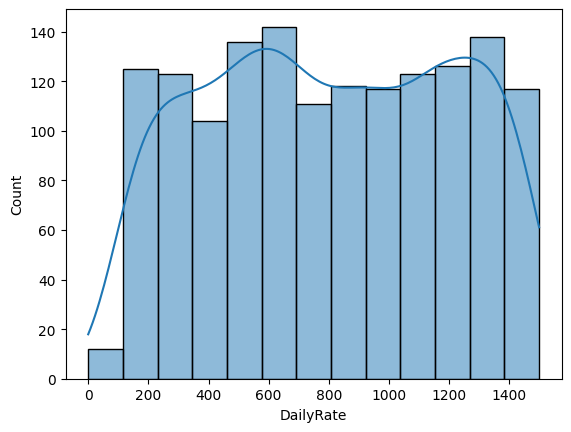

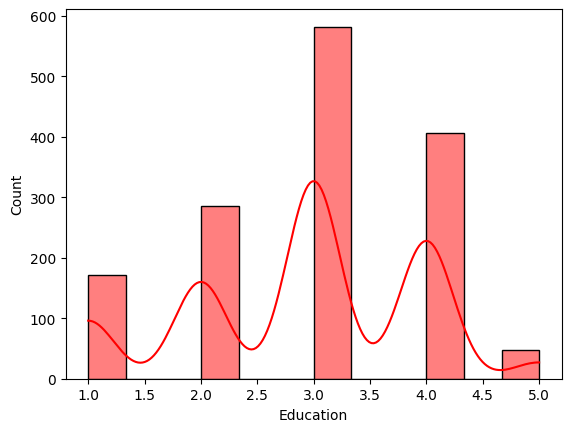

In [6]:
sns.histplot(df['DailyRate'], kde=True)
plt.show()
sns.histplot(df['Education'], kde=True, color='Red')
plt.show()


In [7]:
df.corr()

,Age,BusinessTravel,Education,MaritalStatus,OverTime,EmployeeNumber,DailyRate,Gender,accepted for the interview
Age,1.000000,-0.024143,0.208669,0.094631,-0.028190,-0.015585,0.010357,-0.032253,-0.031446
BusinessTravel,-0.024143,1.000000,-0.000976,0.019663,0.020315,0.014393,-0.001820,0.034675,-0.074106
Education,0.208669,-0.000976,1.000000,-0.002005,0.021475,0.045689,-0.014597,-0.014972,0.088008
MaritalStatus,0.094631,0.019663,-0.002005,1.000000,-0.016716,0.006914,0.071798,0.047527,-0.043778
OverTime,-0.028190,0.020315,0.021475,-0.016716,1.000000,0.025971,-0.005999,0.042469,-0.532409
EmployeeNumber,-0.015585,0.014393,0.045689,0.006914,0.025971,1.000000,-0.041253,0.018119,-0.036753
DailyRate,0.010357,-0.001820,-0.014597,0.071798,-0.005999,-0.041253,1.000000,-0.014613,-0.019253
Gender,-0.032253,0.034675,-0.014972,0.047527,0.042469,0.018119,-0.014613,1.000000,-0.057787
accepted for the interview,-0.031446,-0.074106,0.088008,-0.043778,-0.532409,-0.036753,-0.019253,-0.057787,1.000000


In [8]:
#Spliting the data
X= df.iloc[:,:-1].values
y= df.iloc[:,-1].values
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.2, random_state=0)

In [9]:
#Fitting and training the data
logR = LogisticRegression(max_iter=1000)
logR.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [10]:
score = logR.score(X_train, y_train)
print('Accuracy: ',score)
y_pred = logR.predict(X_test)

Accuracy:  0.9052808046940486


In [11]:
#Accuracy score
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, classification_report, confusion_matrix
avg="micro"
acc=accuracy_score(y_test,y_pred)
f1=f1_score(y_true=y_test,y_pred=y_pred, average=avg)
recall=recall_score(y_true=y_test,y_pred=y_pred, average=avg)
precision=precision_score(y_true=y_test,y_pred=y_pred, average=avg)
print("ACC:",acc)
print("F1:",f1)
print("Recall:",recall)
print("Precision:",precision)

ACC: 0.903010033444816
F1: 0.903010033444816
Recall: 0.903010033444816
Precision: 0.903010033444816


In [12]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.92      0.97      0.95       266
         1.0       0.61      0.33      0.43        33

    accuracy                           0.90       299
   macro avg       0.77      0.65      0.69       299
weighted avg       0.89      0.90      0.89       299



In [13]:
cm= confusion_matrix(y_test, y_pred)
cm

array([[259,   7],
       [ 22,  11]])

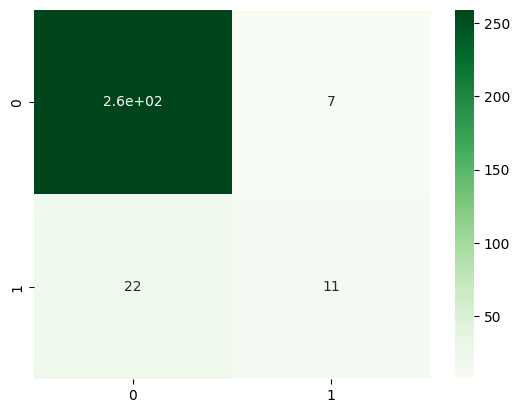

In [14]:
sns.heatmap(cm, cmap='Greens', annot=True)
plt.show()